In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
from PyCMLib import *

In [44]:
sensor_regexes = ['MODIS',
                  'Landsat',
                  (r'LC8|LT5|LE7', 'LandsatID'),
                  (r'\bM.D\d\d', 'MODISID')]

In [45]:
results = process_all_articles('mdpi-rs/**', pf_count_regex, regexes=sensor_regexes)

In [46]:
def f(x):
    if len(x) == 2:
        return x[1]
    else:
        return x

In [47]:
cols = [f(r) for r in sensor_regexes]

In [48]:
r = results[cols]

In [49]:
bool_res = results.copy()

In [50]:
bool_res[cols] = (r > 0)

In [51]:
bool_res.index = pd.DatetimeIndex(bool_res.date)

In [52]:
yearly = bool_res.resample('A', how='sum')

In [53]:
bool_res.resample('A', how='count').title

2009-12-31     82
2010-12-31    132
2011-12-31    137
2012-12-31    189
2013-12-31    338
2014-12-31    589
2015-12-31    772
Freq: A-DEC, Name: title, dtype: int64

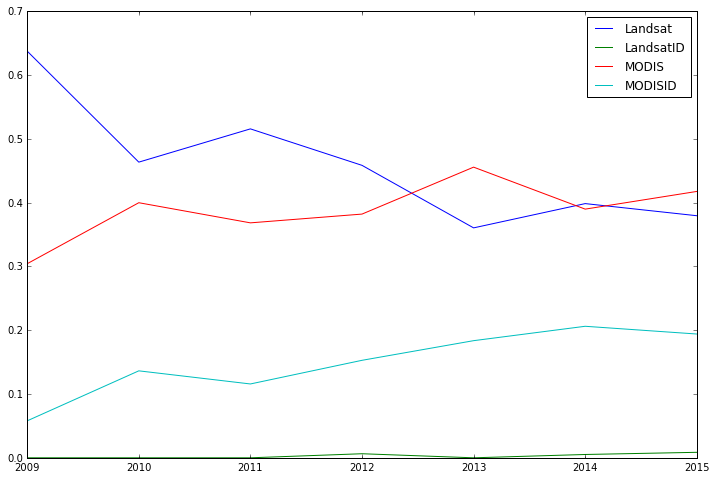

In [54]:
yearly.div(yearly.sum(axis=1), axis='index').plot(figsize=(12,8))

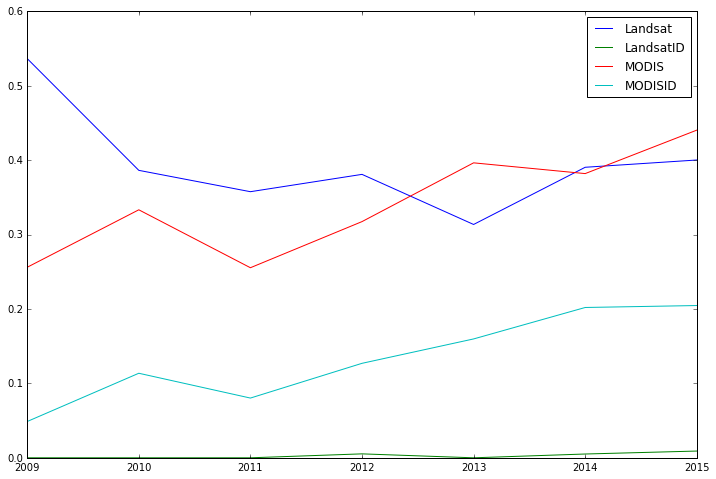

In [55]:
yearly.div(bool_res.resample('A', how='count').title, axis='index').plot(figsize=(12,8))

In [56]:
results[results.LandsatID > 0]

,Landsat,LandsatID,MODIS,MODISID,date,doi,journal,title
305,26,4,0,0,2015-08-20,10.3390/rs70810737,Remote Sensing,Research on the Contribution of Urban Land Sur...
391,19,3,121,26,2015-01-27,10.3390/rs70201359,Remote Sensing,Validation of MODIS and GEOV1 fPAR Products in...
430,17,1,2,0,2015-04-28,10.3390/rs70505373,Remote Sensing,A Semi-Analytical Model for Remote Sensing Ret...
460,45,3,0,0,2015-12-05,10.3390/rs71215838,Remote Sensing,The Mangroves of the Zambezi Delta: Increase i...
529,36,13,32,4,2015-04-24,10.3390/rs70505077,Remote Sensing,Object-Based Flood Mapping and Affected Rice F...
711,70,18,11,0,2015-08-20,10.3390/rs70810763,Remote Sensing,Cross-Calibration of GF-1/WFV over a Desert Si...
833,68,100,2,0,2015-10-16,10.3390/rs71013485,Remote Sensing,Comparison of the Continuity of Vegetation Ind...
957,6,4,3,0,2012-10-19,10.3390/rs4103184,Remote Sensing,Downscaling Land Surface Temperature in an Urb...
1347,5,1,0,0,2014-12-30,10.3390/rs70100319,Remote Sensing,Annual Change Detection by ASTER TIR Data and ...
1394,1,1,2,0,2014-11-28,10.3390/rs61211883,Remote Sensing,Canopy Height Estimation in French Guiana with...
